# Import Statements

In [1]:
import os
os.chdir('../../geodata')

import pandas as pd
import numpy as np
import pickle

from shapely.ops import cascaded_union
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import geoplot

# Load from pickle

In [2]:
os.chdir('../india_RE_transition/data/pickle')

# state shapes
file = open("states.pickle",'rb')
states = pickle.load(file)
file.close()
# grid state shapes
file = open("grid_states.pickle",'rb')
grid_states = pickle.load(file)
file.close()
# state heatmap data
file = open("wind_cf_summary_30.pickle",'rb')
wind_cf_summary_30 = pickle.load(file)
file.close()
file = open("wind_lcoe_summary_30.pickle",'rb')
wind_lcoe_summary_30 = pickle.load(file)
file.close()
file = open("solar_cf_summary_30.pickle",'rb')
solar_cf_summary_30 = pickle.load(file)
file.close()
file = open("solar_lcoe_summary_30.pickle",'rb')
solar_lcoe_summary_30 = pickle.load(file)
file.close()
file = open("wind_cf_summary_47.pickle",'rb')
wind_cf_summary_47 = pickle.load(file)
file.close()
file = open("wind_lcoe_summary_47.pickle",'rb')
wind_lcoe_summary_47 = pickle.load(file)
file.close()
file = open("solar_cf_summary_47.pickle",'rb')
solar_cf_summary_47 = pickle.load(file)
file.close()
file = open("solar_lcoe_summary_47.pickle",'rb')
solar_lcoe_summary_47 = pickle.load(file)
file.close()
# grid heatmap data
file = open("grid_wind_cf_summary_30.pickle",'rb')
grid_wind_cf_summary_30 = pickle.load(file)
file.close()
file = open("grid_wind_lcoe_summary_30.pickle",'rb')
grid_wind_lcoe_summary_30 = pickle.load(file)
file.close()
file = open("grid_solar_cf_summary_30.pickle",'rb')
grid_solar_cf_summary_30 = pickle.load(file)
file.close()
file = open("grid_solar_lcoe_summary_30.pickle",'rb')
grid_solar_lcoe_summary_30 = pickle.load(file)
file.close()
file = open("grid_wind_cf_summary_47.pickle",'rb')
grid_wind_cf_summary_47 = pickle.load(file)
file.close()
file = open("grid_wind_lcoe_summary_47.pickle",'rb')
grid_wind_lcoe_summary_47 = pickle.load(file)
file.close()
file = open("grid_solar_cf_summary_47.pickle",'rb')
grid_solar_cf_summary_47 = pickle.load(file)
file.close()
file = open("grid_solar_lcoe_summary_47.pickle",'rb')
grid_solar_lcoe_summary_47 = pickle.load(file)
file.close()

os.chdir('../../outputs/plots')

In [3]:
cmap = cm.RdBu
cmap_reversed = cm.get_cmap('RdBu_r')

## Plot 2030 State Averages

In [ ]:
# could pool capacity targets by region -- tells us which regions to prioritize
# gigawatts per state by solar and wind vs. state targets
# aggregate LCOE difference between high and low for all states of india 

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(wind_cf_summary_30, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Wind CFs by Coal Incumbency Scenario in 2030")
fig.savefig("wind_cf_summary_30.png")

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(wind_lcoe_summary_30, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Wind LCOE ($/MWh) by Coal Incumbency Scenario in 2030")
fig.savefig("wind_lcoe_summary_30.png")

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(solar_cf_summary_30, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Solar CFs by Coal Incumbency Scenario in 2030")
fig.savefig("solar_cf_summary_30.png")

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(solar_lcoe_summary_30, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Solar LCOE ($/MWh) by Coal Incumbency Scenario in 2030")
fig.savefig("solar_lcoe_summary_30.png")

## Plot 2047 State Averages

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(wind_cf_summary_47, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Wind CFs by Coal Incumbency Scenario in 2047")
fig.savefig("wind_cf_summary_47.png")

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(wind_lcoe_summary_47, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Wind LCOE ($/MWh) by Coal Incumbency Scenario in 2047")
fig.savefig("wind_lcoe_summary_47.png")

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(solar_cf_summary_47, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Solar CFs by Coal Incumbency Scenario in 2047")
fig.savefig("solar_cf_summary_47.png")

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(solar_lcoe_summary_47, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Solar LCOE ($/MWh) by Coal Incumbency Scenario in 2047")
fig.savefig("solar_lcoe_summary_47.png")

## Plot 2030 Grid Averages

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(grid_wind_cf_summary_30, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Wind CFs by Coal Incumbency Scenario in 2030")
fig.savefig("grid_wind_cf_summary_30.png")

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(grid_wind_lcoe_summary_30, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Wind LCOE ($/MWh) by Coal Incumbency Scenario in 2030")
fig.savefig("grid_wind_lcoe_summary_30.png")

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(grid_solar_cf_summary_30, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Solar CFs by Coal Incumbency Scenario in 2030")
fig.savefig("grid_solar_cf_summary_30.png")

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(grid_solar_lcoe_summary_30, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Solar LCOE ($/MWh) by Coal Incumbency Scenario in 2030")
fig.savefig("grid_solar_lcoe_summary_30.png")

## Plot 2047 Grid Averages

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(grid_wind_cf_summary_47, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Wind CFs by Coal Incumbency Scenario in 2047")
fig.savefig("grid_wind_cf_summary_47.png")

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(grid_wind_lcoe_summary_47, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Wind LCOE ($/MWh) by Coal Incumbency Scenario in 2047")
fig.savefig("grid_wind_lcoe_summary_47.png")

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(grid_solar_cf_summary_47, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Solar CFs by Coal Incumbency Scenario in 2047")
fig.savefig("grid_solar_cf_summary_47.png")

In [ ]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         
ax = sns.heatmap(grid_solar_lcoe_summary_47, annot=True, fmt=".4", cmap="YlGnBu")
plt.title("Average State Solar LCOE ($/MWh) by Coal Incumbency Scenario in 2047")
fig.savefig("grid_solar_lcoe_summary_47.png")

In [ ]:
# packing factors for sensitivities, -- look at ranges assumed by other papers
# be mindful of turbines for packing factors -- potential 

# State Averages EDA

In [10]:
missing = states.keys() - set(wind_cf_summary_30.index)

for state in missing:
    wind_cf_summary_30.loc[state] = 0
    wind_cf_summary_47.loc[state] = 0
    wind_lcoe_summary_30.loc[state] = 0
    wind_lcoe_summary_47.loc[state] = 0
    solar_cf_summary_30.loc[state] = 0
    solar_cf_summary_47.loc[state] = 0
    solar_lcoe_summary_30.loc[state] = 0
    solar_lcoe_summary_47.loc[state] = 0
    
wind_cf_summary_30['diff'] = wind_cf_summary_30['High'] - wind_cf_summary_30['Low']
wind_cf_summary_47['diff'] = wind_cf_summary_47['High'] - wind_cf_summary_47['Low']
wind_lcoe_summary_30['diff'] = wind_lcoe_summary_30['High'] - wind_lcoe_summary_30['Low']
wind_lcoe_summary_47['diff'] = wind_lcoe_summary_47['High'] - wind_lcoe_summary_47['Low']
solar_cf_summary_30['diff'] = solar_cf_summary_30['High'] - solar_cf_summary_30['Low']
solar_cf_summary_47['diff'] = solar_cf_summary_47['High'] - solar_cf_summary_47['Low']
solar_lcoe_summary_30['diff'] = solar_lcoe_summary_30['High'] - solar_lcoe_summary_30['Low']
solar_lcoe_summary_47['diff'] = solar_lcoe_summary_47['High'] - solar_lcoe_summary_47['Low']

wind_cf_summary_30['premium'] = wind_cf_summary_30['High'] - wind_cf_summary_30['All']
wind_cf_summary_47['premium'] = wind_cf_summary_47['High'] - wind_cf_summary_47['All']
wind_lcoe_summary_30['premium'] = wind_lcoe_summary_30['High'] - wind_lcoe_summary_30['All']
wind_lcoe_summary_47['premium'] = wind_lcoe_summary_47['High'] - wind_lcoe_summary_47['All']
solar_cf_summary_30['premium'] = solar_cf_summary_30['High'] - solar_cf_summary_30['All']
solar_cf_summary_47['premium'] = solar_cf_summary_47['High'] - solar_cf_summary_47['All']
solar_lcoe_summary_30['premium'] = solar_lcoe_summary_30['High'] - solar_lcoe_summary_30['All']
solar_lcoe_summary_47['premium'] = solar_lcoe_summary_47['High'] - solar_lcoe_summary_47['All']

wind_cf_summary_30['premium %'] = (wind_cf_summary_30['premium'] / wind_cf_summary_30['All']) * 100
wind_cf_summary_47['premium %'] = (wind_cf_summary_47['premium'] / wind_cf_summary_47['All']) * 100
wind_lcoe_summary_30['premium %'] = (wind_lcoe_summary_30['premium'] / wind_lcoe_summary_30['All']) * 100
wind_lcoe_summary_47['premium %'] = (wind_lcoe_summary_47['premium'] / wind_lcoe_summary_47['All']) * 100
solar_cf_summary_30['premium %'] = (solar_cf_summary_30['premium'] / solar_cf_summary_30['All']) * 100
solar_cf_summary_47['premium %'] = (solar_cf_summary_47['premium'] / solar_cf_summary_47['All']) * 100
solar_lcoe_summary_30['premium %'] = (solar_lcoe_summary_30['premium'] / solar_lcoe_summary_30['All']) * 100
solar_lcoe_summary_47['premium %'] = (solar_lcoe_summary_47['premium'] / solar_lcoe_summary_47['All']) * 100

wind_cf_summary_30['geometry'] = pd.Series(states)
wind_cf_summary_47['geometry'] = pd.Series(states)
wind_lcoe_summary_30['geometry'] = pd.Series(states)
wind_lcoe_summary_47['geometry'] = pd.Series(states)
solar_cf_summary_30['geometry'] = pd.Series(states)
solar_cf_summary_47['geometry'] = pd.Series(states)
solar_lcoe_summary_30['geometry'] = pd.Series(states)
solar_lcoe_summary_47['geometry'] = pd.Series(states)

wind_cf_summary_30 = wind_cf_summary_30.fillna(0)
wind_cf_summary_47 = wind_cf_summary_47.fillna(0)
wind_lcoe_summary_30 = wind_lcoe_summary_30.fillna(0)
wind_lcoe_summary_47 = wind_lcoe_summary_47.fillna(0)
solar_cf_summary_30 = solar_cf_summary_30.fillna(0)
solar_cf_summary_47 = solar_cf_summary_47.fillna(0)
solar_lcoe_summary_30 = solar_lcoe_summary_30.fillna(0)
solar_lcoe_summary_47 = solar_lcoe_summary_47.fillna(0)

## Wind 2030 CF Diff

In [12]:
vcenter = 0
vmin, vmax = wind_cf_summary_30['diff'].min(), wind_cf_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

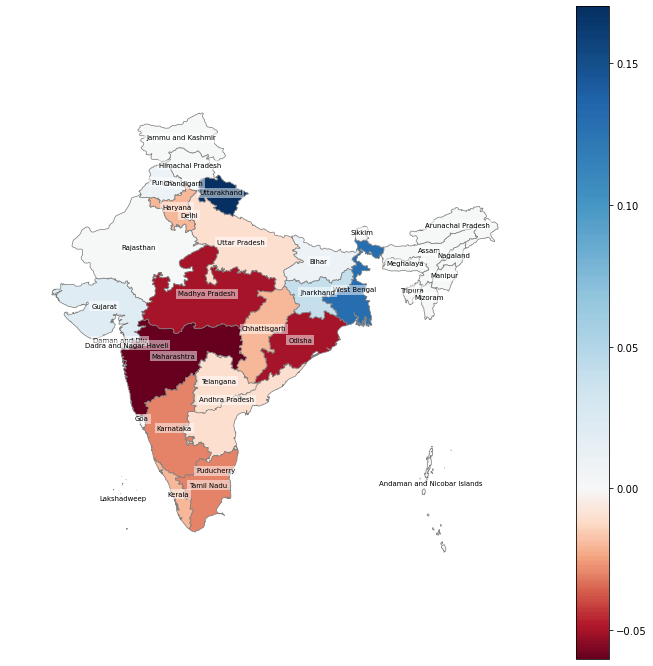

In [13]:
fig = geoplot.choropleth(
    gpd.GeoSeries(wind_cf_summary_30['geometry']), 
    hue=wind_cf_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize,
)

for xy, label in zip(wind_cf_summary_30.geometry, wind_cf_summary_30.index):
    fig.annotate(label, xy=xy.centroid.coords[0], fontsize='x-small', ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})
    
fig = fig.get_figure()
fig.savefig('wind_cf_30_diff')

## Wind 2047 CF Diff

In [ ]:
vmin, vmax = wind_cf_summary_47['diff'].min(), wind_cf_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(wind_cf_summary_47['geometry']), 
    hue=wind_cf_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)

for xy, label in zip(wind_cf_summary_47.geometry, wind_cf_summary_47.index):
    fig.annotate(label, xy=xy.centroid.coords[0], fontsize='x-small', ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('wind_cf_47_diff')

## Wind 2030 LCOE Diff

In [ ]:
vmin, vmax = wind_lcoe_summary_30['diff'].min(), wind_lcoe_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(wind_lcoe_summary_30['geometry']), 
    hue=wind_lcoe_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)

for xy, label in zip(wind_lcoe_summary_30.geometry, wind_lcoe_summary_30.index):
    fig.annotate(label, xy=xy.centroid.coords[0], fontsize='x-small', ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('wind_lcoe_30_diff')

## Wind 2047 LCOE Diff

In [ ]:
vmin, vmax = wind_lcoe_summary_47['diff'].min(), wind_lcoe_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(wind_lcoe_summary_47['geometry']), 
    hue=wind_lcoe_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)

for xy, label in zip(wind_lcoe_summary_47.geometry, wind_lcoe_summary_47.index):
    fig.annotate(label, xy=xy.centroid.coords[0], fontsize='x-small', ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('wind_lcoe_47_diff')

## Solar 2030 CF Diff

In [ ]:
vmin, vmax = solar_cf_summary_30['diff'].min(), solar_cf_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(solar_cf_summary_30['geometry']), 
    hue=solar_cf_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)

for xy, label in zip(solar_cf_summary_30.geometry, solar_cf_summary_30.index):
    fig.annotate(label, xy=xy.centroid.coords[0], fontsize='x-small', ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('solar_cf_30_diff')

## Solar 2047 CF Diff

In [ ]:
vmin, vmax = solar_cf_summary_47['diff'].min(), solar_cf_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(solar_cf_summary_47['geometry']), 
    hue=solar_cf_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)

for xy, label in zip(solar_cf_summary_47.geometry, solar_cf_summary_47.index):
    fig.annotate(label, xy=xy.centroid.coords[0], fontsize='x-small', ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('solar_cf_47_diff')

## Solar 2030 LCOE Diff

In [ ]:
vmin, vmax = solar_lcoe_summary_30['diff'].min(), solar_lcoe_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(solar_lcoe_summary_30['geometry']), 
    hue=solar_lcoe_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)

for xy, label in zip(solar_lcoe_summary_30.geometry, solar_lcoe_summary_30.index):
    fig.annotate(label, xy=xy.centroid.coords[0], fontsize='x-small', ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('solar_lcoe_30_diff')

## Solar 2047 LCOE Diff

In [ ]:
vmin, vmax = solar_lcoe_summary_47['diff'].min(), solar_lcoe_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(solar_lcoe_summary_47['geometry']), 
    hue=solar_lcoe_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)

for xy, label in zip(solar_lcoe_summary_47.geometry, solar_lcoe_summary_47.index):
    fig.annotate(label, xy=xy.centroid.coords[0], fontsize='x-small', ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('solar_lcoe_47_diff')

# Grid Averages EDA

In [ ]:
grid_wind_cf_summary_30['diff'] = grid_wind_cf_summary_30['High'] - grid_wind_cf_summary_30['Low']
grid_wind_cf_summary_47['diff'] = grid_wind_cf_summary_47['High'] - grid_wind_cf_summary_47['Low']
grid_wind_lcoe_summary_30['diff'] = grid_wind_lcoe_summary_30['High'] - grid_wind_lcoe_summary_30['Low']
grid_wind_lcoe_summary_47['diff'] = grid_wind_lcoe_summary_47['High'] - grid_wind_lcoe_summary_47['Low']
grid_solar_cf_summary_30['diff'] = grid_solar_cf_summary_30['High'] - grid_solar_cf_summary_30['Low']
grid_solar_cf_summary_47['diff'] = grid_solar_cf_summary_47['High'] - grid_solar_cf_summary_47['Low']
grid_solar_lcoe_summary_30['diff'] = grid_solar_lcoe_summary_30['High'] - grid_solar_lcoe_summary_30['Low']
grid_solar_lcoe_summary_47['diff'] = grid_solar_lcoe_summary_47['High'] - grid_solar_lcoe_summary_47['Low']

grid_wind_cf_diff = grid_wind_cf_summary_30 - grid_wind_cf_summary_47
grid_solar_cf_diff = grid_solar_cf_summary_30 - grid_solar_cf_summary_47
grid_wind_lcoe_diff = grid_wind_lcoe_summary_30 - grid_wind_lcoe_summary_47
grid_solar_lcoe_diff = grid_solar_cf_summary_30 - grid_solar_cf_summary_47

grid_wind_cf_summary_30['geometry'] = pd.Series(grid_states)
grid_wind_cf_summary_47['geometry'] = pd.Series(grid_states)
grid_wind_lcoe_summary_30['geometry'] = pd.Series(grid_states)
grid_wind_lcoe_summary_47['geometry'] = pd.Series(grid_states)
grid_solar_cf_summary_30['geometry'] = pd.Series(grid_states)
grid_solar_cf_summary_47['geometry'] = pd.Series(grid_states)
grid_solar_lcoe_summary_30['geometry'] = pd.Series(grid_states)
grid_solar_lcoe_summary_47['geometry'] = pd.Series(grid_states)
grid_wind_cf_diff['geometry'] = pd.Series(grid_states)
grid_solar_cf_diff['geometry'] = pd.Series(grid_states)
grid_wind_lcoe_diff['geometry'] = pd.Series(grid_states)
grid_solar_lcoe_diff['geometry'] = pd.Series(grid_states)

## Wind 2030 CF Diff

In [ ]:
vmin, vmax = grid_wind_cf_summary_30['diff'].min(), grid_wind_cf_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_wind_cf_summary_30['geometry']), 
    hue=grid_wind_cf_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)

for xy, label in zip(grid_wind_cf_summary_30.geometry, grid_wind_cf_summary_30.index):
    fig.annotate(label, xy=xy.centroid.coords[0], ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('grid_wind_cf_30_diff')

## Wind 2047 CF Diff

In [ ]:
vmin, vmax = grid_wind_cf_summary_47['diff'].min(), grid_wind_cf_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_wind_cf_summary_47['geometry']), 
    hue=grid_wind_cf_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)

for xy, label in zip(grid_wind_cf_summary_30.geometry, grid_wind_cf_summary_30.index):
    fig.annotate(label, xy=xy.centroid.coords[0], ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('grid_wind_cf_47_diff')

## Wind 2030 LCOE Diff

In [ ]:
vmin, vmax = grid_wind_lcoe_summary_30['diff'].min(), grid_wind_lcoe_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_wind_lcoe_summary_30['geometry']), 
    hue=grid_wind_lcoe_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)

for xy, label in zip(grid_wind_cf_summary_30.geometry, grid_wind_cf_summary_30.index):
    fig.annotate(label, xy=xy.centroid.coords[0], ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('grid_wind_lcoe_30_diff')

## Wind 2047 LCOE Diff

In [ ]:
vmin, vmax = grid_wind_lcoe_summary_47['diff'].min(), grid_wind_lcoe_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_wind_lcoe_summary_47['geometry']), 
    hue=grid_wind_lcoe_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)

for xy, label in zip(grid_wind_cf_summary_30.geometry, grid_wind_cf_summary_30.index):
    fig.annotate(label, xy=xy.centroid.coords[0], ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('grid_wind_lcoe_47_diff')

## Solar 2030 CF Diff

In [ ]:
vmin, vmax = grid_solar_cf_summary_30['diff'].min(), grid_solar_cf_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_solar_cf_summary_30['geometry']), 
    hue=grid_solar_cf_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)

for xy, label in zip(grid_wind_cf_summary_30.geometry, grid_wind_cf_summary_30.index):
    fig.annotate(label, xy=xy.centroid.coords[0], ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('grid_solar_cf_30_diff')

## Solar 2047 CF Diff

In [ ]:
vmin, vmax = grid_solar_cf_summary_47['diff'].min(), grid_solar_cf_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_solar_cf_summary_47['geometry']), 
    hue=grid_solar_cf_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap,
    norm=normalize
)

for xy, label in zip(grid_wind_cf_summary_30.geometry, grid_wind_cf_summary_30.index):
    fig.annotate(label, xy=xy.centroid.coords[0], ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('grid_solar_cf_47_diff')

## Solar 2030 LCOE Diff

In [ ]:
vmin, vmax = grid_solar_lcoe_summary_30['diff'].min(), grid_solar_lcoe_summary_30['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_solar_lcoe_summary_30['geometry']), 
    hue=grid_solar_lcoe_summary_30['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)

for xy, label in zip(grid_wind_cf_summary_30.geometry, grid_wind_cf_summary_30.index):
    fig.annotate(label, xy=xy.centroid.coords[0], ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('grid_solar_lcoe_30_diff')

## Solar 2047 LCOE Diff

In [ ]:
vmin, vmax = grid_solar_lcoe_summary_47['diff'].min(), grid_solar_lcoe_summary_47['diff'].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)

In [ ]:
fig = geoplot.choropleth(
    gpd.GeoSeries(grid_solar_lcoe_summary_47['geometry']), 
    hue=grid_solar_lcoe_summary_47['diff'],
    figsize=(12, 12), 
    legend=True,
    edgecolor='gray',
    linewidth=0.75,
    cmap=cmap_reversed,
    norm=normalize
)

for xy, label in zip(grid_wind_cf_summary_30.geometry, grid_wind_cf_summary_30.index):
    fig.annotate(label, xy=xy.centroid.coords[0], ha='center',
                 bbox={'facecolor': 'white', 'alpha':0.5, 'pad': 2, 'edgecolor':'none'})

fig = fig.get_figure()
fig.savefig('grid_solar_lcoe_47_diff')